In [76]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
filenames = os.listdir('Sales_Data')

for index,file in enumerate(filenames):
    if index == 0:
        df = pd.read_csv(f'Sales_Data/{file}')
    else:
        temp = pd.read_csv(f'Sales_Data/{file}')
        df = pd.concat([df,temp],axis=0)

df.to_csv('all_data.csv',index=False)

In [3]:
df = pd.read_csv('all_data.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [5]:
def month(x):
    dic = {'01':'Janurary','02':'February','03':'March','04':'April',
          '05':'May','06':'June','07':'July','08':'August','09':'September',
          '10':'October','11':'November','12':'December'}
    month_num = x[0:2]
    return dic[month_num]

In [6]:
df = df.dropna(axis=0,how='any')
df = df[df['Order Date'] != 'Order Date']

In [7]:
df['Month'] = df['Order Date'].apply(month)

In [8]:
# most orders
df.groupby('Month').size().index[df.groupby('Month').size().argmax()]

'December'

In [9]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [10]:
# most sales
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [11]:
df.groupby('Month').sum().index[df.groupby('Month').sum()['Sales'].argmax()]

'December'

In [12]:
month_df = df.groupby('Month').sum()
month_df

,Quantity Ordered,Price Each,Sales
Month,,,
April,20558,3367671.02,3390670.24
August,13448,2230345.42,2244467.88
December,28114,4588415.41,4613443.34
February,13449,2188884.72,2202022.42
Janurary,10903,1811768.38,1822256.73
July,16072,2632539.56,2647775.76
June,15253,2562025.61,2577802.26
March,17005,2791207.83,2807100.38
May,18667,3135125.13,3152606.75


In [13]:
months = ['Janurary','February','March','April','May','June','July',
         'August','September','October','November','December']
sales = []
for month in months:
    sales.append(month_df.loc[month,'Sales'])

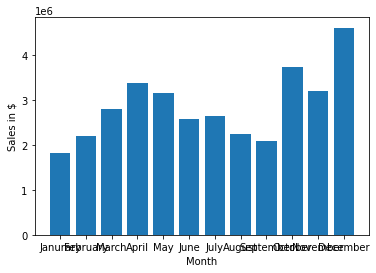

In [14]:
plt.bar(months,sales)
plt.xticks(months)
plt.ylabel('Sales in $')
plt.xlabel('Month')
plt.show()

In [15]:
def city(x):
    return x[x.index(',')+1:x.index(',',x.index(',')+2)]

In [16]:
df['City'] = df['Purchase Address'].apply(city)

In [18]:
city_df = df.groupby('City').sum()

In [22]:
# city with most sales
city = city_df.index[city_df['Sales'].argmax()]
print(city)

 San Francisco


In [24]:
city_df.loc[city,'Sales']

8262203.91

In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [27]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12


In [29]:
df.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


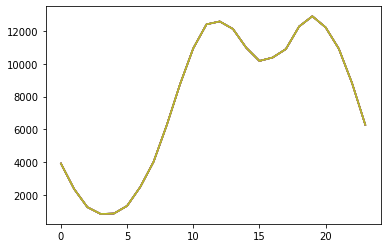

In [31]:
hours = [hour for hour,data in df.groupby('Hour')]

plt.plot(hours,df.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

In [34]:
df2 = df[df['Order ID'].duplicated(keep=False)]

In [37]:
df2['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


/var/folders/pb/06j5b0m11v17j53n5v8sn6t00000gn/T/ipykernel_50381/2494950627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [39]:
df2 = df2[['Order ID','Grouped']].drop_duplicates()

In [40]:
df2.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [48]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

,Quantity Ordered,Price Each,Sales,Hour
Product,,,,
20in Monitor,4129,451068.99,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916
27in FHD Monitor,7550,1125974.93,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445
Flatscreen TV,4819,1440000.00,1445700.00,68815


In [62]:
top_seller = df.groupby('Product').sum().index[df.groupby('Product').sum()['Quantity Ordered'].argmax()]
amt_sold = df.groupby('Product').sum().loc[top_seller,'Quantity Ordered']


In [63]:
print(f'{top_seller} sold {amt_sold} quantity')

AAA Batteries (4-pack) sold 31017 quantity


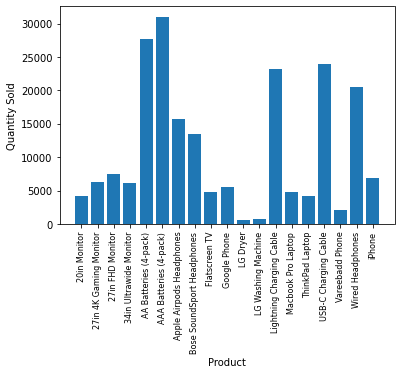

In [66]:
quantity_ordered = df.groupby('Product').sum()['Quantity Ordered']
products = df.groupby('Product').sum().index

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

/var/folders/pb/06j5b0m11v17j53n5v8sn6t00000gn/T/ipykernel_50381/1658295592.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


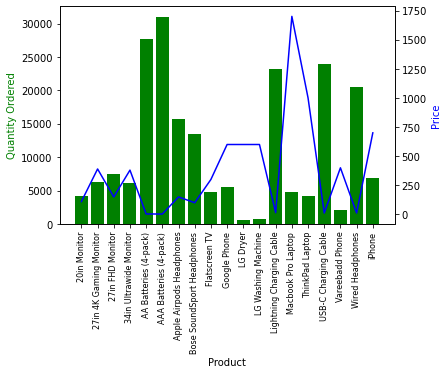

In [73]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product')
ax1.set_xticklabels(products,rotation='vertical',size=8)

ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price',color='b')


plt.show()

In [80]:
# Pivot Tables

pivot = pd.pivot_table(df,index=['City','Month'],values=['Quantity Ordered'],aggfunc=np.sum)
pivot

Quantity Ordered
City     Month                      
 Atlanta April                  1634
         August                 1053
         December               2225
         February               1042
         Janurary                876
...                              ...
 Seattle March                  1331
         May                    1405
         November               1583
         October                1877
         September              1059

[108 rows x 1 columns]

In [81]:
# Pivot Tables

pivot2 = pd.pivot_table(df,index=['City','Month'],values=['Price Each'],aggfunc=np.mean)
pivot2

Price Each
City     Month                
 Atlanta April      192.167717
         August     179.004559
         December   180.541508
         February   187.875865
         Janurary   189.202153
...                        ...
 Seattle March      181.862283
         May        169.662995
         November   176.369240
         October    187.829063
         September  165.578497

[108 rows x 1 columns]